<a href="https://colab.research.google.com/github/muhammadali636/CIFAR-10-Classifier/blob/main/a3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
################################################################################
#                 Convolutional Neural Networks on CIFAR-10 (PyTorch)          #
#                           Updated Starter Notebook                           #
################################################################################

"""
This notebook demonstrates how to build and train Convolutional Neural Networks
(CNNs) on the CIFAR-10 dataset using PyTorch. It includes:

1. Data loading and basic transformations.
2. A simple CNN (SimpleCNN) with an optional batch normalization flag.
3. Placeholders for two custom CNN architectures (CustomCNN1 and CustomCNN2).
4. A training loop with validation and loss plotting.
5. Optional hyperparameter tuning and regularization hints.
6. Visualization of the first convolutional layer filters.

Feel free to modify, expand, or experiment with different configurations.
"""

################################################################################
#                           1. DEVICE CONFIGURATION                             #
################################################################################

# Check if GPU is available; if not, use CPU.
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")




Using device: cuda:0


In [2]:
################################################################################
#                     2. DATA LOADING AND TRANSFORMATIONS                       #
################################################################################

"""
Define the transformations for the CIFAR-10 dataset.
Currently, only basic normalization is applied.
Students are encouraged to experiment with additional augmentations
(e.g., random flips, crops, rotations) to potentially improve model performance.
"""

import torchvision
import torchvision.transforms as transforms

transform_train = transforms.Compose([
    # TODO: Consider adding advanced augmentations here, e.g.,
    # transforms.RandomHorizontalFlip(),
    # transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')



100%|██████████| 170M/170M [00:13<00:00, 13.1MB/s]


Sample training images:


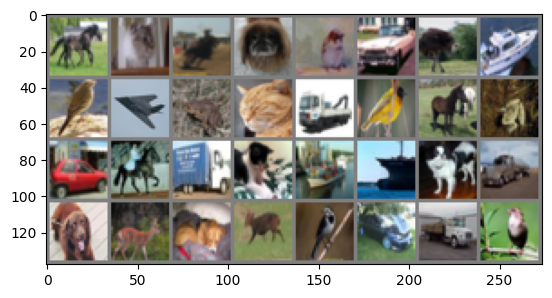

Labels: horse |   cat | horse |   dog |  bird |   car |  bird |  ship |  bird | plane |  frog |   cat | truck |  bird | horse |  frog |   car | horse | truck |   cat |  ship |  ship |   dog | truck |   dog |  deer |   dog |  deer |  bird |   car | truck |  bird


In [3]:
################################################################################
#                        3. EXPLORING SAMPLE DATA                              #
################################################################################

import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    """Utility function to unnormalize and display an image."""
    img = img / 2 + 0.5  # Reverse normalization for display
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Display a few training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

print("Sample training images:")
imshow(torchvision.utils.make_grid(images))
print('Labels:', ' | '.join('%5s' % classes[labels[j]] for j in range(len(labels))))



In [4]:
################################################################################
#                      4. DEFINING CNN ARCHITECTURES                            #
################################################################################

"""
We define a simple CNN (SimpleCNN) and two placeholders for custom architectures
(CustomCNN1, CustomCNN2). The parameter 'use_batchnorm' toggles batch normalization
(which is optional and not required for all models). Batch normalization can help
stabilize training, but it is not necessary for all experiments.
"""

import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, use_batchnorm=False):
        super(SimpleCNN, self).__init__()
        self.use_batchnorm = use_batchnorm

        # First convolutional layer
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        if self.use_batchnorm:
            self.bn1 = nn.BatchNorm2d(16)

        # Second convolutional layer
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        if self.use_batchnorm:
            self.bn2 = nn.BatchNorm2d(32)

        # Fully connected layers
        self.fc1 = nn.Linear(8 * 8 * 32, 128)
        self.fc2 = nn.Linear(128, 10)
        # Note: We do not add an explicit softmax because nn.CrossEntropyLoss includes it.

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        if self.use_batchnorm:
            x = self.bn1(x)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        if self.use_batchnorm:
            x = self.bn2(x)
        x = x.view(-1, 8 * 8 * 32)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class CustomCNN1(nn.Module):
    """
    TODO: Implement your own architecture here.
    Consider adding extra convolutional layers, dropout for regularization,
    or modifying filter sizes. Use batch normalization if desired.
    """
    def __init__(self, use_batchnorm=False):
        super(CustomCNN1, self).__init__()
        self.use_batchnorm = use_batchnorm
        # DONE: Define your layers here.

        # First convolutional block
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        if self.use_batchnorm:
            self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(2, 2)

        # Second convolutional block
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        if self.use_batchnorm:
            self.bn2 = nn.BatchNorm2d(64)

        # Third convolutional block
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        if self.use_batchnorm:
            self.bn3 = nn.BatchNorm2d(128)

        # Fully connected layers
        # Input image size is assumed to be 32x32. After three poolings, spatial dims become 4x4.
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 10)

        # Dropout layer for regularization
        self.dropout = nn.Dropout(0.5)

        #pass

    def forward(self, x):
        # DONE: Implement the forward pass.
         # Block 1
        x = self.conv1(x)
        if self.use_batchnorm:
            x = self.bn1(x)
        x = F.relu(x)
        x = self.pool(x)

        # Block 2
        x = self.conv2(x)
        if self.use_batchnorm:
            x = self.bn2(x)
        x = F.relu(x)
        x = self.pool(x)

        # Block 3
        x = self.conv3(x)
        if self.use_batchnorm:
            x = self.bn3(x)
        x = F.relu(x)
        x = self.pool(x)

        # Flatten and fully connected layers
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class CustomCNN2(nn.Module):
    """
    TODO: Implement a second custom architecture here.
    Experiment with a deeper or wider network, additional dropout, etc.
    """
    def __init__(self, use_batchnorm=False):
        super(CustomCNN2, self).__init__()
        self.use_batchnorm = use_batchnorm
        # DONE: Define your layers here.
        # Convolutional block 1
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        if self.use_batchnorm:
            self.bn1 = nn.BatchNorm2d(32)

        # Convolutional block 2
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        if self.use_batchnorm:
            self.bn2 = nn.BatchNorm2d(64)

        # Convolutional block 3
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        if self.use_batchnorm:
            self.bn3 = nn.BatchNorm2d(128)

        # Convolutional block 4
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        if self.use_batchnorm:
            self.bn4 = nn.BatchNorm2d(256)

        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)

        # After four poolings from a 32x32 image, the spatial dimension becomes 2x2.
        self.fc1 = nn.Linear(256 * 2 * 2, 512)
        self.fc2 = nn.Linear(512, 10)

        #pass

    def forward(self, x):
        # DONE: Implement the forward pass.
        # Block 1
        x = self.conv1(x)
        if self.use_batchnorm:
            x = self.bn1(x)
        x = F.relu(x)
        x = self.pool(x)

        # Block 2
        x = self.conv2(x)
        if self.use_batchnorm:
            x = self.bn2(x)
        x = F.relu(x)
        x = self.pool(x)

        # Block 3
        x = self.conv3(x)
        if self.use_batchnorm:
            x = self.bn3(x)
        x = F.relu(x)
        x = self.pool(x)

        # Block 4
        x = self.conv4(x)
        if self.use_batchnorm:
            x = self.bn4(x)
        x = F.relu(x)
        x = self.pool(x)

        # Flatten and fully connected layers
        x = x.view(x.size(0), -1)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x



In [5]:
################################################################################
#                5. MODEL SELECTION AND INITIALIZATION                          #
################################################################################

def get_model(model_flag, use_batchnorm=False):
    """
    Returns one of the CNN models based on 'model_flag'.
    model_flag: 1 for SimpleCNN, 2 for CustomCNN1, 3 for CustomCNN2.
    use_batchnorm: If True, includes batch normalization layers.
    """
    if model_flag == 1:
        return SimpleCNN(use_batchnorm=use_batchnorm).to(device)
    elif model_flag == 2:
        return CustomCNN1(use_batchnorm=use_batchnorm).to(device)
    elif model_flag == 3:
        return CustomCNN2(use_batchnorm=use_batchnorm).to(device)
    else:
        raise ValueError("Invalid model flag. Choose 1, 2, or 3.")



In [6]:
################################################################################
#                    6. TRAINING AND VALIDATION FUNCTIONS                       #
################################################################################

def train(net, criterion, optimizer, epochs=10):
    """
    Train the network 'net' for a given number of epochs.
    Returns lists of training and validation losses.
    """
    train_losses = []
    val_losses = []

    net.train()  # Set model to training mode
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)

            optimizer.zero_grad()       # Zero the gradients
            outputs = net(inputs)       # Forward pass
            loss = criterion(outputs, labels)
            loss.backward()             # Backpropagation

            # Optional: Insert regularization techniques here (e.g., dropout is defined in the model)
            optimizer.step()            # Update parameters

            running_loss += loss.item()

        avg_train_loss = running_loss / len(trainloader)
        val_loss = validate(net, criterion)
        train_losses.append(avg_train_loss)
        val_losses.append(val_loss)

        print(f"Epoch [{epoch+1}/{epochs}] Train Loss: {avg_train_loss:.4f} | Validation Loss: {val_loss:.4f}")

    print('Finished Training')
    return train_losses, val_losses

def validate(net, criterion):
    """
    Evaluate the network on the test set.
    Returns the average validation loss.
    """
    net.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_val_loss = val_loss / len(testloader)
    accuracy = 100.0 * correct / total
    print(f"Validation Loss: {avg_val_loss:.4f}, Accuracy: {accuracy:.2f}%")
    return avg_val_loss



In [7]:
################################################################################
#                        7. PLOTTING LOSS CURVES                                #
################################################################################

def plot_losses(train_losses, val_losses):
    """
    Plots the training and validation loss curves over epochs.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()



In [8]:
################################################################################
#                     8. HYPERPARAMETER TUNING & REGULARIZATION                   #
################################################################################

"""
TODO: Hyperparameter Search - NOTHING TO ACTUALLY DO HERE - This is a note of things that might appear elsewhere
---------------------------
Experiment with:
  - Learning rate, momentum (or Adam's beta)
  - Weight decay for L2 regularization (e.g., weight_decay=1e-5 in the optimizer)
  - Dropout layers (inserted in the model definition)
  - Different batch sizes

Document your experiments and how different values affect the training dynamics.

TODO: Regularization
--------------------
- L2 Regularization: Use 'weight_decay' parameter in your optimizer.
- Dropout: Insert nn.Dropout(p=0.5) in your network architecture (if desired).
"""



"\nTODO: Hyperparameter Search - NOTHING TO ACTUALLY DO HERE - This is a note of things that might appear elsewhere\n---------------------------\nExperiment with:\n  - Learning rate, momentum (or Adam's beta)\n  - Weight decay for L2 regularization (e.g., weight_decay=1e-5 in the optimizer)\n  - Dropout layers (inserted in the model definition)\n  - Different batch sizes\n\nDocument your experiments and how different values affect the training dynamics.\n\nTODO: Regularization\n--------------------\n- L2 Regularization: Use 'weight_decay' parameter in your optimizer.\n- Dropout: Insert nn.Dropout(p=0.5) in your network architecture (if desired).\n"

In [9]:
################################################################################
#                      9. VISUALIZING FIRST LAYER FILTERS                        #
################################################################################

def visualize_first_layer_filters(net):
    """
    Visualizes the filters of the first convolutional layer (conv1) in the network.
    The filters are normalized to the range [0, 1] for display.
    """
    # Extract weights: shape (out_channels, in_channels, kernel_height, kernel_width)
    weights = net.conv1.weight.data.cpu().numpy()
    num_filters = weights.shape[0]

    import math
    ncols = int(math.sqrt(num_filters))
    nrows = math.ceil(num_filters / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*2, nrows*2))
    axes = axes.flatten()
    for i in range(num_filters):
        # Normalize filter weights for visualization
        f = weights[i]
        f_min, f_max = f.min(), f.max()
        f = (f - f_min) / (f_max - f_min)
        # Transpose to (kernel_height, kernel_width, channels)
        f = np.transpose(f, (1, 2, 0))
        axes[i].imshow(f)
        axes[i].axis('off')
    for j in range(num_filters, len(axes)):
        axes[j].axis('off')
    plt.suptitle("First Convolutional Layer Filters")
    plt.show()



Model (flag=1, use_batchnorm=True):
 SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)
Validation Loss: 1.0888, Accuracy: 61.09%
Epoch [1/10] Train Loss: 1.3603 | Validation Loss: 1.0888
Validation Loss: 0.9502, Accuracy: 66.26%
Epoch [2/10] Train Loss: 0.9709 | Validation Loss: 0.9502
Validation Loss: 0.8690, Accuracy: 69.30%
Epoch [3/10] Train Loss: 0.8111 | Validation Loss: 0.8690
Validation Loss: 0.8867, Accuracy: 69.20%
Epoch [4/10] Train Loss: 0.6930 | Validation Loss: 0.8867
Validation Loss: 0.8768, Accuracy: 70.23%
Epoch [5/10] Train Loss: 0.5910 | Validation Loss: 0.

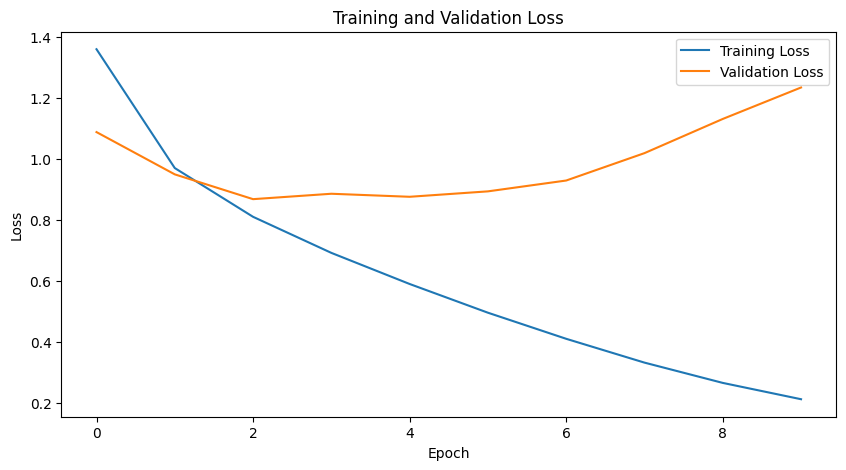


Visualizing First Layer Filters:


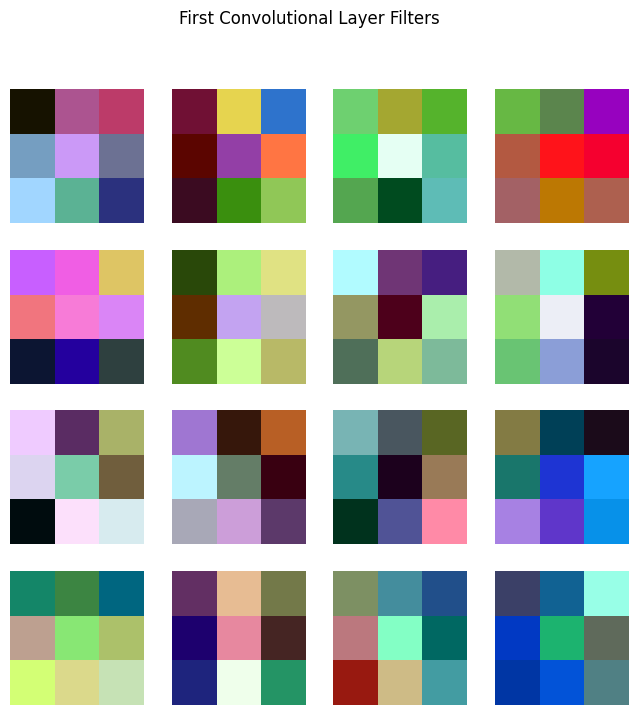


Final Test Evaluation:
Validation Loss: 1.2349, Accuracy: 69.25%


'\nSuggestions for further exploration:\n- Experiment with CustomCNN1 and CustomCNN2 architectures.\n- Add dropout or other regularization techniques to reduce overfitting.\n- Modify data augmentation strategies to further improve generalization.\n- Perform systematic hyperparameter tuning and document your findings.\n- Compare runs with and without batch normalization to observe its impact.\n\nHappy coding and experimenting!\n'

In [10]:
################################################################################
#                       10. MAIN EXPERIMENTS / EXAMPLE RUN                       #
################################################################################
import torch.optim as optim

# Model selection: set model_flag to 1 (SimpleCNN), 2 (CustomCNN1), or 3 (CustomCNN2)
model_flag = 1
# Toggle batch normalization: set use_batchnorm to True to enable, False to disable.
use_batchnorm = True

# Instantiate the chosen model
net = get_model(model_flag, use_batchnorm=use_batchnorm)
print(f"Model (flag={model_flag}, use_batchnorm={use_batchnorm}):\n", net)

# Define loss function (CrossEntropyLoss includes softmax internally)
criterion = nn.CrossEntropyLoss()

# Define optimizer; experiment with different optimizers and hyperparameters here.
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
# Example: To add L2 regularization, try:
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-5)

# Train the model
epochs_to_train = 10  # Adjust the number of epochs as needed
train_losses, val_losses = train(net, criterion, optimizer, epochs=epochs_to_train)

# Plot the training and validation loss curves
plot_losses(train_losses, val_losses)

# Visualize the first convolutional layer filters (after training)
print("\nVisualizing First Layer Filters:")
visualize_first_layer_filters(net)

# Final test evaluation
print("\nFinal Test Evaluation:")
_ = validate(net, criterion)

################################################################################
#                          END OF STARTER NOTEBOOK                              #
################################################################################

"""
Suggestions for further exploration:
- Experiment with CustomCNN1 and CustomCNN2 architectures.
- Add dropout or other regularization techniques to reduce overfitting.
- Modify data augmentation strategies to further improve generalization.
- Perform systematic hyperparameter tuning and document your findings.
- Compare runs with and without batch normalization to observe its impact.

Happy coding and experimenting!
"""